Importing packages

In [1]:
import cv2
import os
import numpy as np
import mediapipe as mp
import seaborn as sns
import time

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [3]:
import matplotlib.pyplot as plt
import pyttsx3
import tkinter as tk 
from tkinter import Tk, Button, Label, messagebox, Frame, Canvas
from PIL import Image, ImageTk
import threading

Text to speech model

In [4]:
engine = pyttsx3.init()

engine.setProperty('rate', 150)  # Speed of speech
engine.setProperty('volume', 0.9)  # Volume (0.0 to 1.0)

Hand Sign recognizing packages and tools

In [5]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils

Labelling and Color corruption

In [6]:
def load_dataset(data_dir):
    data = []
    labels = []
    class_map = {label: idx for idx, label in enumerate(sorted(os.listdir(data_dir)))}

    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)
    for label in class_map.keys():
        label_dir = os.path.join(data_dir, label)
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Extract hand landmarks
            result = hands.process(img_rgb)
            if result.multi_hand_landmarks:
                for hand_landmarks in result.multi_hand_landmarks:
                    landmarks = []
                    for lm in hand_landmarks.landmark:
                        landmarks.extend([lm.x, lm.y, lm.z])
                    data.append(landmarks)
                    labels.append(class_map[label])

    hands.close()
    return np.array(data), to_categorical(labels, len(class_map)), class_map

data_dir = "C:/Users/Nithish Kumar/OneDrive/Desktop/Project/Dataset/Image Dataset"
X, y, class_map = load_dataset(data_dir)

In [19]:
def load_dataset(data_dir, max_images):
    data = []
    labels = []
    class_map = {label: idx for idx, label in enumerate(sorted(os.listdir(data_dir)))}
    hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=1, min_detection_confidence=0.5)

    image_count = 0  # Counter to track total images processed

    for label in class_map.keys():
        label_dir = os.path.join(data_dir, label)
        img_files = os.listdir(label_dir)[:max_images]  # Select only first `max_images` files

        for img_file in img_files:
            if image_count >= max_images:
                break  # Stop if we reach the limit

            img_path = os.path.join(label_dir, img_file)
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Extract hand landmarks
            result = hands.process(img_rgb)
            if result.multi_hand_landmarks:
                for hand_landmarks in result.multi_hand_landmarks:
                    landmarks = []
                    for lm in hand_landmarks.landmark:
                        landmarks.extend([lm.x, lm.y, lm.z])
                    data.append(landmarks)
                    labels.append(class_map[label])

            image_count += 1  # Increment count after processing an image

            if image_count >= max_images:
                break  # Stop processing more images

    hands.close()
    return np.array(data), to_categorical(labels, len(class_map)), class_map

# Set max_images=300 to limit dataset size
data_dir = "C:/Users/Nithish Kumar/OneDrive/Desktop/Project/Dataset/Gesture Image Data"
X, y, class_map = load_dataset(data_dir, 400)


For direct access and Labelling the datas

In [30]:
data_dir = "C:/Users/Nithish Kumar/OneDrive/Desktop/Project/Dataset/Image Dataset"
class_map = {label: idx for idx, label in enumerate(sorted(os.listdir(data_dir)))}

Traning and Validation

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Built the Model

In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(class_map), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Nithish Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train and Save the Model

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0322 - loss: 3.5945 - val_accuracy: 0.1933 - val_loss: 3.3751
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0931 - loss: 3.3301 - val_accuracy: 0.2082 - val_loss: 3.0746
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1399 - loss: 3.0738 - val_accuracy: 0.4498 - val_loss: 2.7478
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2318 - loss: 2.7733 - val_accuracy: 0.5502 - val_loss: 2.3539
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3091 - loss: 2.4224 - val_accuracy: 0.6803 - val_loss: 1.9444
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4187 - loss: 2.0893 - val_accuracy: 0.8067 - val_loss: 1.6193
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4645 - loss: 1.8820 - val_accuracy: 0.7770 - val_loss: 1.4047
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5483 - loss: 1.6316 - val_accuracy: 0.8104 - val_loss

In [34]:
model.save("model.h5")

Plotting the Traning and Validation accuracy

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


C:\Users\Nithish Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nithish Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nithish Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

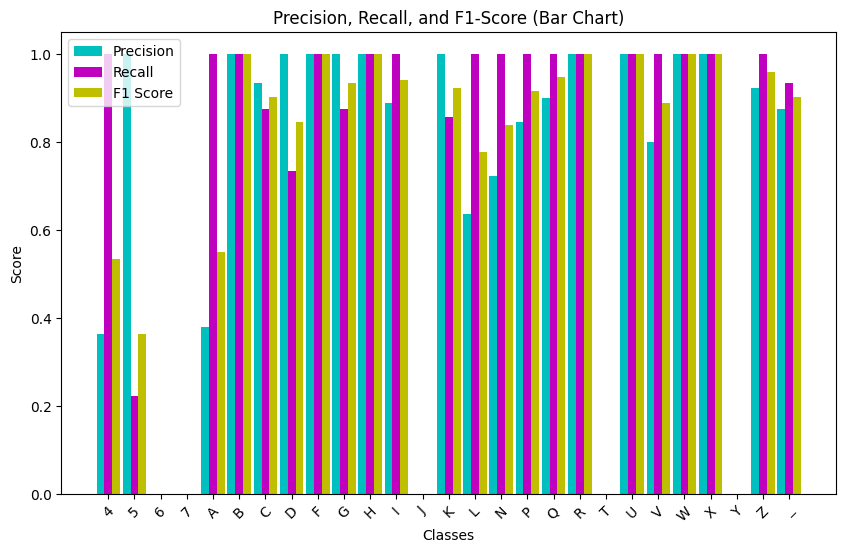

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict on validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true = np.argmax(y_val, axis=1)

# Get actual class labels present in y_true
actual_classes = np.unique(y_true)  # Ensure only present labels are used
filtered_class_names = [list(class_map.keys())[i] for i in actual_classes]  # Map back to names

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes, labels=actual_classes)

# Generate classification report correctly
report = classification_report(y_true, y_pred_classes, labels=actual_classes, target_names=filtered_class_names, output_dict=True)

precision = [report[label]['precision'] for label in filtered_class_names]
recall = [report[label]['recall'] for label in filtered_class_names]
f1_score = [report[label]['f1-score'] for label in filtered_class_names]

# Plot Precision, Recall, and F1-score
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.3
index = np.arange(len(filtered_class_names))

ax.bar(index, precision, bar_width, label='Precision', color='c')
ax.bar(index + bar_width, recall, bar_width, label='Recall', color='m')
ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1 Score', color='y')

ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score (Bar Chart)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(filtered_class_names, rotation=45)
ax.legend()
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


C:\Users\Nithish Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nithish Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Nithish Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

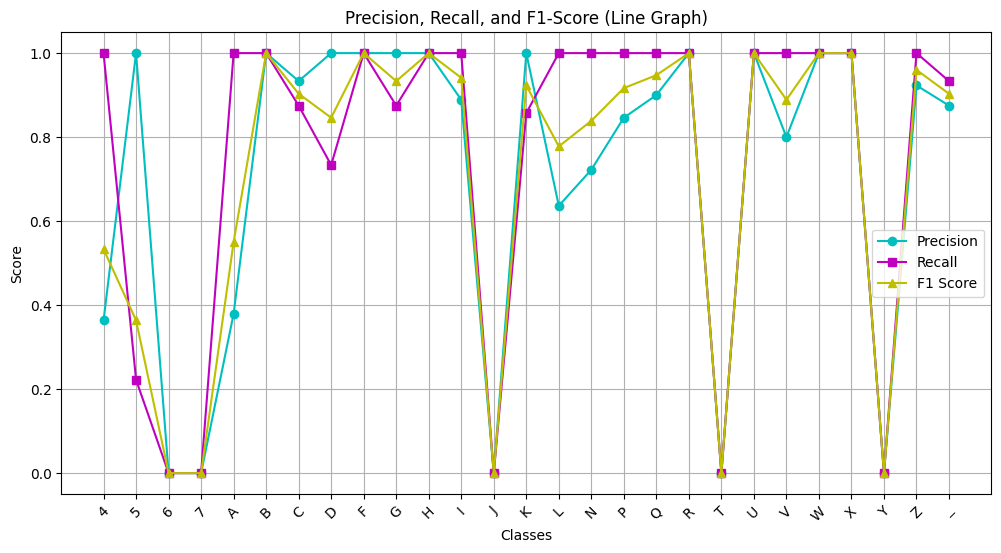

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predict on validation data
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true = np.argmax(y_val, axis=1)

# Get actual class labels present in y_true
actual_classes = np.unique(y_true)  # Ensure only present labels are used
filtered_class_names = [list(class_map.keys())[i] for i in actual_classes]  # Map back to names

# Generate classification report
report = classification_report(y_true, y_pred_classes, labels=actual_classes, target_names=filtered_class_names, output_dict=True)

precision = [report[label]['precision'] for label in filtered_class_names]
recall = [report[label]['recall'] for label in filtered_class_names]
f1_score = [report[label]['f1-score'] for label in filtered_class_names]

# Plot Precision, Recall, and F1-score as Line Graph
plt.figure(figsize=(12, 6))
plt.plot(filtered_class_names, precision, marker='o', linestyle='-', color='c', label="Precision")
plt.plot(filtered_class_names, recall, marker='s', linestyle='-', color='m', label="Recall")
plt.plot(filtered_class_names, f1_score, marker='^', linestyle='-', color='y', label="F1 Score")

plt.xlabel("Classes")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-Score (Line Graph)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


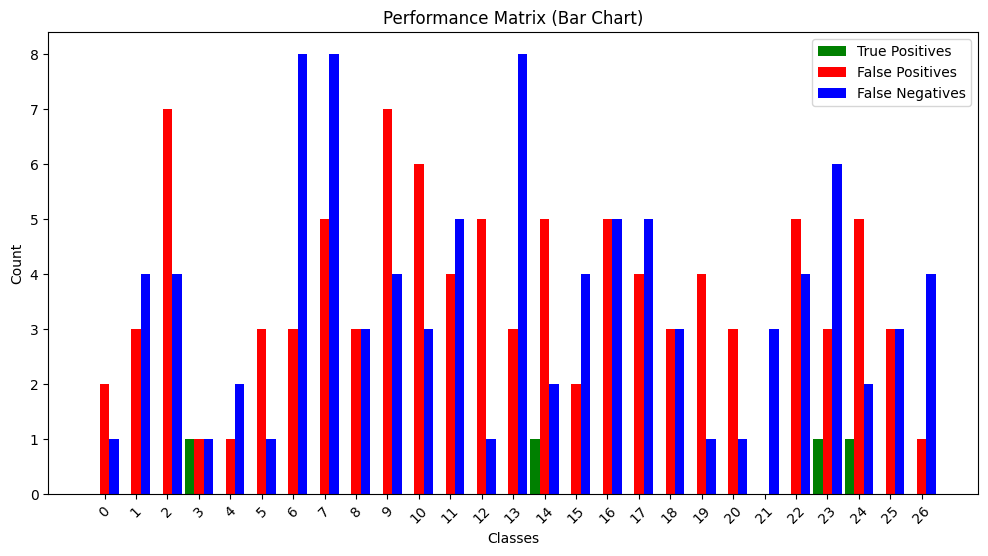

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Simulated ground truth and predictions (replace with actual model outputs)
num_classes = 27  # Adjust based on your actual number of classes
y_true = np.random.randint(0, num_classes, 100)  # Simulated true labels
y_pred_classes = np.random.randint(0, num_classes, 100)  # Simulated predictions

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
classes = [str(i) for i in range(num_classes)]  # Ensure correct class mapping

# Compute true positives, false positives, and false negatives
true_positives = np.diag(cm)
false_positives = np.sum(cm, axis=0) - true_positives
false_negatives = np.sum(cm, axis=1) - true_positives

# Plot Confusion Matrix as a Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.3
index = np.arange(len(classes))

ax.bar(index, true_positives, bar_width, label='True Positives', color='g')
ax.bar(index + bar_width, false_positives, bar_width, label='False Positives', color='r')
ax.bar(index + 2 * bar_width, false_negatives, bar_width, label='False Negatives', color='b')

ax.set_xlabel('Classes')
ax.set_ylabel('Count')
ax.set_title('Performance Matrix (Bar Chart)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(classes, rotation=45)
ax.legend()
plt.show()


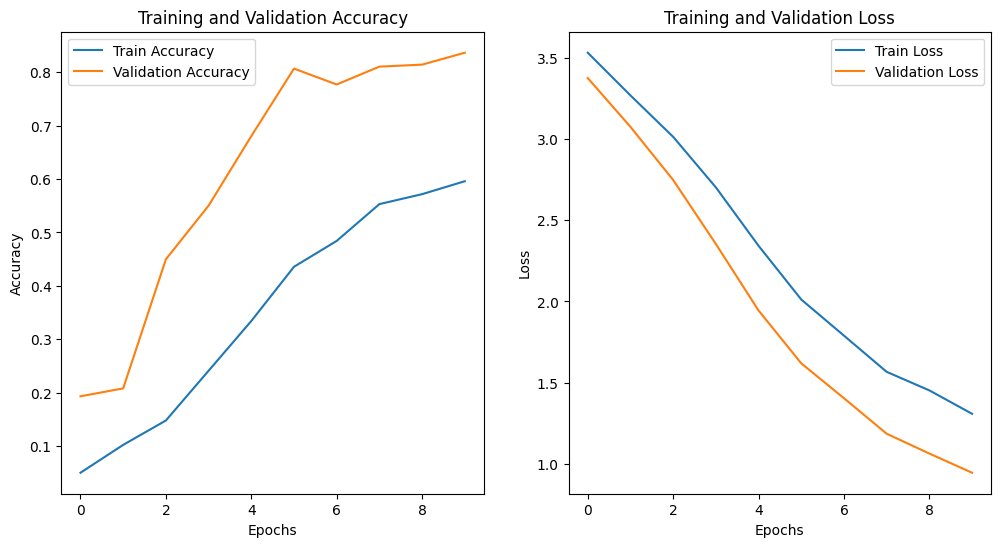

In [17]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Hand Sign Recognition using Mediapipe

In [36]:
model = load_model("model.h5")
inverse_class_map = {v: k for k, v in class_map.items()}

cap = cv2.VideoCapture(0)
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(rgb_frame)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

            # Extract hand landmarks
            landmarks = []
            for lm in hand_landmarks.landmark:
                landmarks.extend([lm.x, lm.y, lm.z])  # Flatten x, y, z into a list

            # Predict gesture
            landmarks = np.array(landmarks).reshape(1, -1)
            prediction = model.predict(landmarks)
            class_id = np.argmax(prediction)
            sign = inverse_class_map[class_id]

            # Text to speech 
            engine.say(sign)
            
            # Display prediction on screen
            cv2.putText(frame, sign, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

            # Wait for the speaking to finish
            engine.runAndWait()

    cv2.imshow("Hand Sign Recognition", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
hands.close()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


UI with voice pack

In [21]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import Label, Frame, Canvas, Button
from PIL import Image, ImageTk
import mediapipe as mp
from tensorflow.keras.models import load_model
import os
import time
import pyttsx3

# Initialize text-to-speech engine
engine = pyttsx3.init()
engine.setProperty("rate", 100)

# Load the gesture recognition model and class map
model = load_model("model.h5")
data_dir = "C:/Users/Nithish Kumar/OneDrive/Desktop/Project/Dataset/Image Dataset"
class_map = {label: idx for idx, label in enumerate(sorted(os.listdir(data_dir)))}
inverse_class_map = {v: k for k, v in class_map.items()}

# Mediapipe setup
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=1, min_detection_confidence=0.5)

# Initialize the Tkinter window
root = tk.Tk()
root.title("Hand Sign Detection")
root.geometry("1200x600")
root.configure(bg="lightblue")

# Frames for layout
video_frame = Frame(root, bg="black", width=800, height=600)
video_frame.pack(side="left", fill="both", expand=True)

storage_frame = Frame(root, bg="white", width=400, height=600)
storage_frame.pack(side="right", fill="both", expand=False)

# Label for video feed
video_label = Label(video_frame)
video_label.pack(fill="both", expand=True)

# Canvas for detected letters
canvas = Canvas(storage_frame, bg="white", width=400, height=550)
canvas.pack(fill="both", expand=True)

# Buttons for starting and stopping detection
button_frame = Frame(storage_frame, bg="white")
button_frame.pack(fill="x")
start_button = Button(button_frame, text="Start Detection", command=lambda: start_detection(), font=("Helvetica", 14))
start_button.pack(side="left", padx=10, pady=5)
stop_button = Button(button_frame, text="Stop Detection", command=lambda: stop_detection(), font=("Helvetica", 14))
stop_button.pack(side="left", padx=10, pady=5)
speak_button = Button(button_frame, text="Speak", command=lambda: speak_text(), font=("Helvetica", 14))
speak_button.pack(side="right", padx=10, pady=5)

# Letter storage
letters = []
letter_x = 10
letter_y = 10
cap = None  # Initialize video capture as None
running = False  # Flag to control detection loop
last_prediction_time = time.time()

# Function to update the video feed and detect hand signs
def update_video():
    global letters, letter_x, letter_y, running, last_prediction_time

    if not running:
        return

    ret, frame = cap.read()
    if not ret:
        return

    frame = cv2.flip(frame, 1)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(rgb_frame)

    current_time = time.time()
    if current_time - last_prediction_time >= 1:
        last_prediction_time = current_time

        if result.multi_hand_landmarks:
            for hand_landmarks in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

                # Extract hand landmarks
                landmarks = []
                for lm in hand_landmarks.landmark:
                    landmarks.extend([lm.x, lm.y, lm.z])

                landmarks = np.array(landmarks).reshape(1, -1)
                print("Landmarks shape:", landmarks.shape)
                
                # Predict gesture
                prediction = model.predict(landmarks)
                class_id = np.argmax(prediction)
                sign = inverse_class_map.get(class_id, "Unknown")
                print("Detected sign:", sign)

                # Add the detected letter to storage
                letters.append(sign)

                # Draw the letter on the canvas
                canvas.create_text(letter_x, letter_y, text=sign, font=("Helvetica", 24), fill="black", anchor="nw")

                # Update position for the next letter
                letter_x += 40
                if letter_x + 30 > 400:
                    letter_x = 10
                    letter_y += 40

    # Display the video frame
    img = Image.fromarray(rgb_frame)
    imgtk = ImageTk.PhotoImage(image=img)
    video_label.imgtk = imgtk
    video_label.configure(image=imgtk)

    root.after(10, update_video)

# Function to start detection
def start_detection():
    global cap, running
    if cap is None:
        cap = cv2.VideoCapture(0)
    running = True
    update_video()

# Function to stop detection
def stop_detection():
    global running
    running = False

# Function to speak detected letters
def speak_text():
    text = " ".join(letters)
    if text:
        engine.say(text)
        engine.runAndWait()

# Start the Tkinter event loop
root.mainloop()

# Release resources
if cap is not None:
    cap.release()
hands.close()

Landmarks shape: (1, 63)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Detected sign: X
Landmarks shape: (1, 63)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Detected sign: R
Landmarks shape: (1, 63)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Detected sign: R
Landmarks shape: (1, 63)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Detected sign: 5
Landmarks shape: (1, 63)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Detected sign: Q
Landmarks shape: (1, 63)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Detected sign: X
Landmarks shape: (1, 63)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Detected sign: X
